In [1]:
import sys
import copy
import time

import numpy as np
import torch
import matplotlib.pyplot as plt

from pygsp import graphs

sys.path.insert(0, '..')
from graph_deep_decoder import datasets as ds
from graph_deep_decoder.architecture import GraphDecoder
from graph_deep_decoder.model import Model
from graph_deep_decoder import utils

SEED = 0
torch.manual_seed(SEED)
np.random.seed(SEED)

## Sensor Network

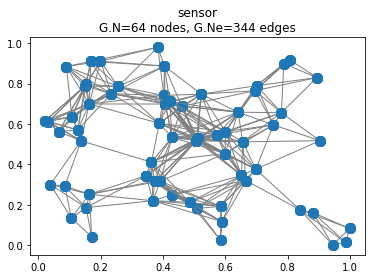

In [2]:
G = graphs.Sensor(64)
A = G.W.todense().astype(int)
G.plot()

K = 3
hs = np.random.rand(K)
hs /= np.sum(hs)
x_dw = ds.DiffusedWhiteGS(G, ds.NonLin.NONE, K, coefs=hs)
H = x_dw.H

# Compute E[JJ]
H_norm = H/np.linalg.norm(H)        
Z = 1-np.arccos(H_norm.dot(H_norm.T))/np.pi
Z_0 = Z - np.mean(Z)

E_JJ_an = 0.5*Z*(H_norm.dot(H_norm.T))

# Get eigendecomposition
L_H, V_H = utils.ordered_eig(H)
L_Z, V_Z = utils.ordered_eig(Z)
V_Z = utils.choose_eig_sign(V_Z, V_H)
L_Z0, V_Z0 = utils.ordered_eig(Z_0)
V_Z0 = utils.choose_eig_sign(V_Z0, V_H)
L_E_JJ_an, V_E_JJ_an = utils.ordered_eig(E_JJ_an)
V_E_JJ_an = utils.choose_eig_sign(V_E_JJ_an, V_H)

[3.21162265e+01 1.05160014e-01 4.95000031e-02 2.21249388e-02
 9.00664331e-03 5.34215610e-03 4.02211402e-03 2.46196632e-03
 1.31324012e-03 6.89741222e-04]
[0.15709453 0.05100443 0.02582793 0.00918845 0.0053474  0.00408769
 0.00247415 0.00131549 0.00070482 0.00050169]


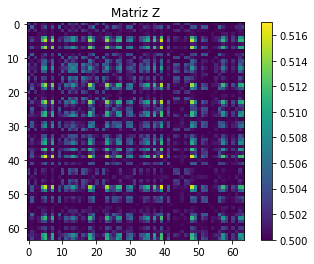

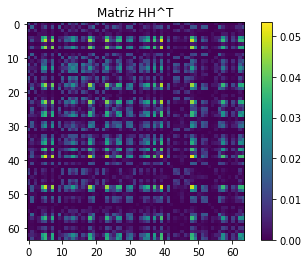

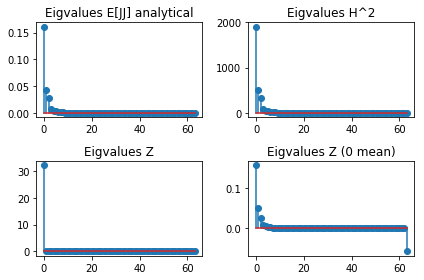

In [3]:
# Plot matrices
plt.figure()
plt.imshow(Z)
plt.colorbar()
plt.title('Matriz Z')
plt.figure()
plt.imshow(H_norm.dot(H_norm.T))
plt.colorbar()
plt.title('Matriz HH^T')

# Compare eigenvalues
plt.figure()
plt.subplot(221)
plt.stem(L_E_JJ_an)
plt.title('Eigvalues E[JJ] analytical')
plt.subplot(222)
plt.stem(L_H**2)
plt.title('Eigvalues H^2')
plt.subplot(223)
plt.stem(L_Z)
plt.title('Eigvalues Z')
plt.subplot(224)
plt.stem(L_Z0)
plt.title('Eigvalues Z (0 mean)')
plt.tight_layout()
print(L_Z[:10])
print(L_Z0[:10])

C:\Users\reysa\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


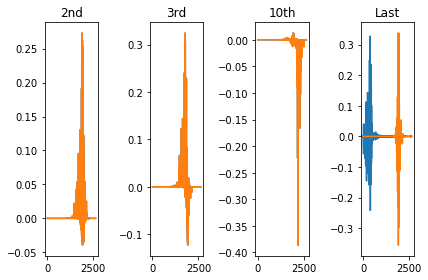

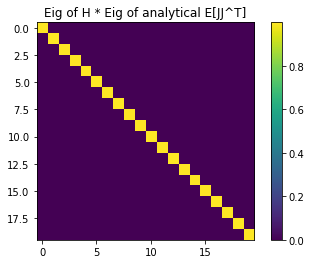

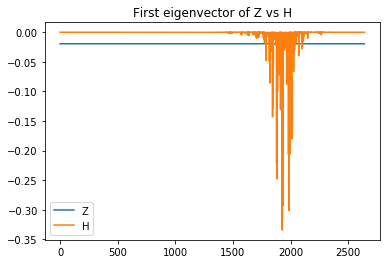

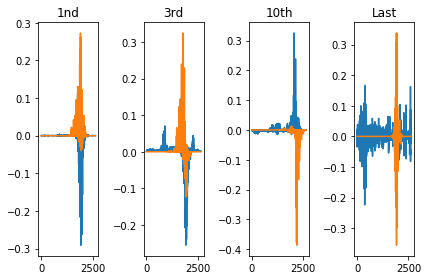

In [11]:
# Plot eigenvectors HH vs JJ
plt.figure()
plt.subplot(141)
plt.plot(V_E_JJ_an[:, 1])
plt.plot(V_H[:,1])
plt.title('2nd')
plt.subplot(142)
plt.plot(V_E_JJ_an[:, 2])
plt.plot(V_H[:,2])
plt.title('3rd')
plt.subplot(143)
plt.plot(V_E_JJ_an[:, 9])
plt.plot(V_H[:,9])
plt.title('10th')
plt.subplot(144)
plt.plot(V_E_JJ_an[:, -1])
plt.plot(V_H[:, -1])
plt.title('Last')
plt.tight_layout()

# Check orthogonality 
k = 20
plt.figure()
plt.imshow(abs(V_H[:,:k].T.dot(V_E_JJ_an[:,:k])))
plt.colorbar()
plt.title('Eig of H * Eig of analytical E[JJ^T]')

# Plot eigenvectors
plt.figure()
plt.plot(V_Z[:,0])
plt.plot(V_H[:,0])
plt.legend(['Z','H'])
plt.title('First eigenvector of Z vs H')

plt.figure()
plt.subplot(141)
plt.plot(V_Z[:, 1])
plt.plot(V_H[:,1])
plt.title('1nd')
plt.subplot(142)
plt.plot(V_Z[:, 2])
plt.plot(V_H[:,2])
plt.title('3rd')
plt.subplot(143)
plt.plot(V_Z[:, 9])
plt.plot(V_H[:,9])
plt.title('10th')
plt.subplot(144)
plt.plot(V_Z[:, -1])
plt.plot(V_H[:, -1])
plt.title('Last')
plt.tight_layout()

## Using Zachary's Karate Graph

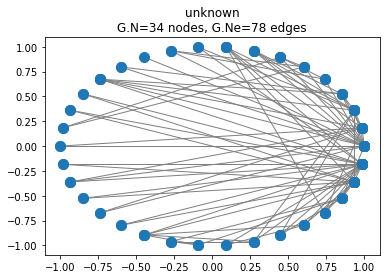

In [5]:
A = np.load('../dataset/karate_Adj.npy')
G = graphs.Graph(A)
G.set_coordinates('ring2D')
G.plot()

K = 3
hs = np.random.rand(K)
hs /= np.sum(hs)
x_dw = ds.DiffusedWhiteGS(G, ds.NonLin.NONE, K, coefs=hs)
H = x_dw.H

# Compute E[JJ]
H_norm = H/np.linalg.norm(H)        
Z = 1-np.arccos(H_norm.dot(H_norm.T))/np.pi
Z_0 = Z - np.mean(Z)

E_JJ_an = 0.5*Z*(H_norm.dot(H_norm.T))

# Get eigendecomposition
L_H, V_H = utils.ordered_eig(H)
L_Z, V_Z = utils.ordered_eig(Z)
V_Z = utils.choose_eig_sign(V_Z, V_H)
L_Z0, V_Z0 = utils.ordered_eig(Z_0)
V_Z0 = utils.choose_eig_sign(V_Z0, V_H)
L_E_JJ_an, V_E_JJ_an = utils.ordered_eig(E_JJ_an)
V_E_JJ_an = utils.choose_eig_sign(V_E_JJ_an, V_H)

C:\Users\reysa\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


[1.71378855e+01 6.45271115e-02 5.66923951e-02 1.96729369e-02
 1.25255990e-02 8.43963947e-03 4.53498794e-03 3.37634072e-03
 2.79399694e-03 1.93459072e-03]
[0.11156137 0.05669319 0.02563081 0.01254756 0.00844571 0.00497045
 0.00337762 0.00289273 0.00193505 0.00165305]


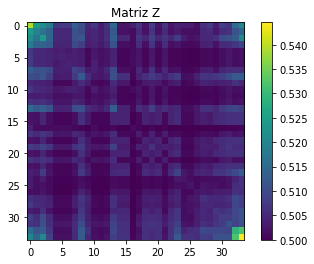

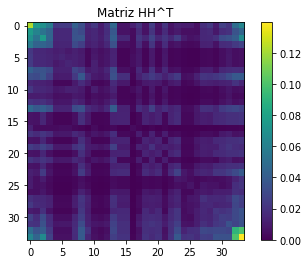

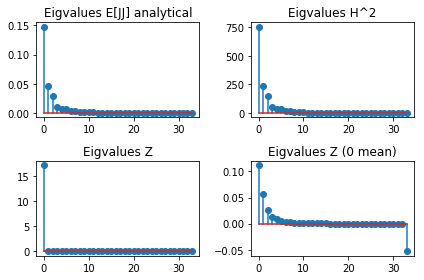

In [6]:
# Plot matrices
plt.figure()
plt.imshow(Z)
plt.colorbar()
plt.title('Matriz Z')
plt.figure()
plt.imshow(H_norm.dot(H_norm.T))
plt.colorbar()
plt.title('Matriz HH^T')

# Compare eigenvalues
plt.figure()
plt.subplot(221)
plt.stem(L_E_JJ_an)
plt.title('Eigvalues E[JJ] analytical')
plt.subplot(222)
plt.stem(L_H**2)
plt.title('Eigvalues H^2')
plt.subplot(223)
plt.stem(L_Z)
plt.title('Eigvalues Z')
plt.subplot(224)
plt.stem(L_Z0)
plt.title('Eigvalues Z (0 mean)')
plt.tight_layout()
print(L_Z[:10])
print(L_Z0[:10])

C:\Users\reysa\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


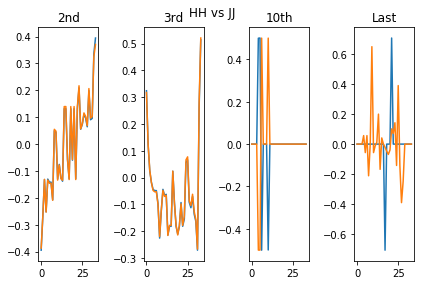

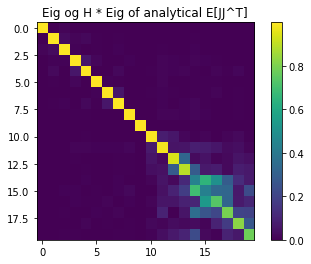

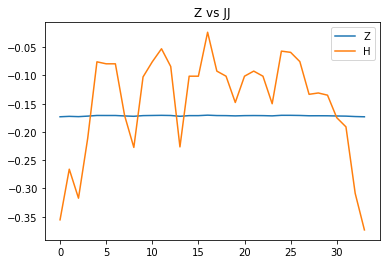

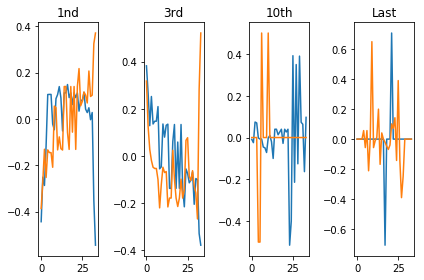

In [7]:
# Plot eigenvectors HH vs JJ
plt.figure()
plt.subplot(141)
plt.plot(V_E_JJ_an[:, 1])
plt.plot(V_H[:,1])
plt.title('2nd')
plt.subplot(142)
plt.plot(V_E_JJ_an[:, 2])
plt.plot(V_H[:,2])
plt.title('3rd')
plt.subplot(143)
plt.plot(V_E_JJ_an[:, 9])
plt.plot(V_H[:,9])
plt.title('10th')
plt.subplot(144)
plt.plot(V_E_JJ_an[:, -1])
plt.plot(V_H[:, -1])
plt.title('Last')
plt.tight_layout()

# Check orthogonality 
k = 20
plt.figure()
plt.imshow(abs(V_H[:,:k].T.dot(V_E_JJ_an[:,:k])))
plt.colorbar()
plt.title('Eig of H * Eig of analytical E[JJ^T]')

# Plot eigenvectors
plt.figure()
plt.plot(V_Z[:,0])
plt.plot(V_H[:,0])
plt.legend(['Z','H'])
plt.title('First eigenvector of Z vs H')

plt.figure()
plt.subplot(141)
plt.plot(V_Z[:, 1])
plt.plot(V_H[:,1])
plt.title('1nd')
plt.subplot(142)
plt.plot(V_Z[:, 2])
plt.plot(V_H[:,2])
plt.title('3rd')
plt.subplot(143)
plt.plot(V_Z[:, 9])
plt.plot(V_H[:,9])
plt.title('10th')
plt.subplot(144)
plt.plot(V_Z[:, -1])
plt.plot(V_H[:, -1])
plt.title('Last')
plt.tight_layout()

## Using Minnesota Graph

True


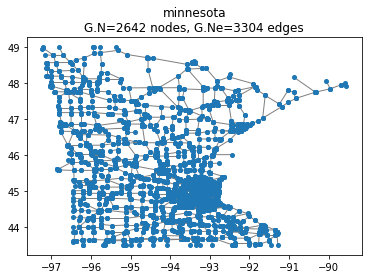

In [12]:
G = graphs.Minnesota()
A = G.W.todense().astype(int)
G.plot()

K = 5
hs = np.random.rand(K)
hs /= np.sum(hs)
x_dw = ds.DiffusedWhiteGS(G, ds.NonLin.NONE, K, coefs=hs)
H = x_dw.H
print(np.array_equal(H,H.T))

# Compute E[JJ]
H_norm = H/np.linalg.norm(H)        
Z = 1-np.arccos(H_norm.dot(H_norm.T))/np.pi
Z_0 = Z - np.mean(Z)

E_JJ_an = 0.5*Z*(H_norm.dot(H_norm.T))

# Get eigendecomposition
L_H, V_H = utils.ordered_eig(H)
L_Z, V_Z = utils.ordered_eig(Z)
V_Z = utils.choose_eig_sign(V_Z, V_H)
L_Z0, V_Z0 = utils.ordered_eig(Z_0)
V_Z0 = utils.choose_eig_sign(V_Z0, V_H)
L_E_JJ_an, V_E_JJ_an = utils.ordered_eig(E_JJ_an)
V_E_JJ_an = utils.choose_eig_sign(V_E_JJ_an, V_H)

C:\Users\reysa\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


[1.32100216e+03 3.96972679e-03 3.63700651e-03 3.58477145e-03
 3.33346985e-03 3.27575593e-03 3.09062949e-03 3.03447426e-03
 2.94751955e-03 2.79450637e-03]
[0.00399567 0.00365235 0.00359326 0.00333356 0.00329327 0.00310116
 0.0030356  0.00296816 0.00279755 0.00273778]


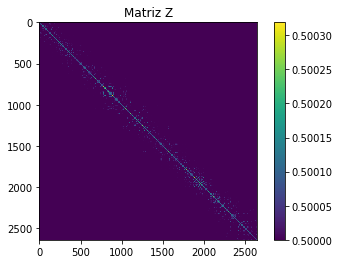

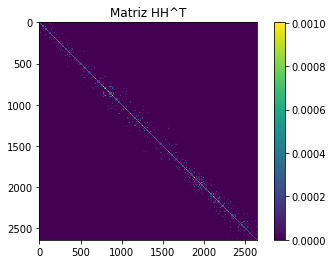

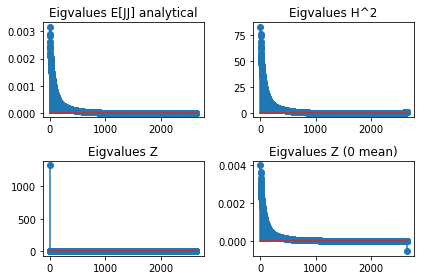

In [13]:
# Plot matrices
plt.figure()
plt.imshow(Z)
plt.colorbar()
plt.title('Matriz Z')
plt.figure()
plt.imshow(H_norm.dot(H_norm.T))
plt.colorbar()
plt.title('Matriz HH^T')

# Compare eigenvalues
plt.figure()
plt.subplot(221)
plt.stem(L_E_JJ_an)
plt.title('Eigvalues E[JJ] analytical')
plt.subplot(222)
plt.stem(L_H**2)
plt.title('Eigvalues H^2')
plt.subplot(223)
plt.stem(L_Z)
plt.title('Eigvalues Z')
plt.subplot(224)
plt.stem(L_Z0)
plt.title('Eigvalues Z (0 mean)')
plt.tight_layout()
print(L_Z[:10])
print(L_Z0[:10])

C:\Users\reysa\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


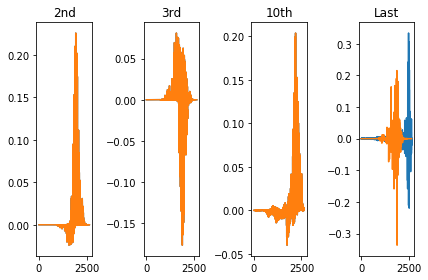

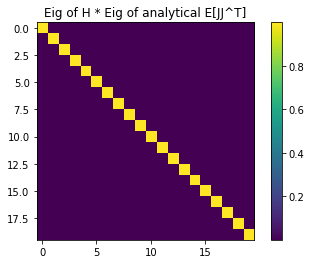

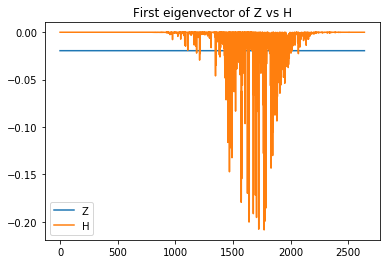

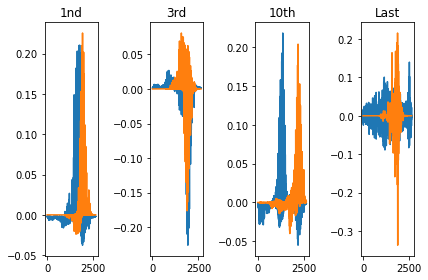

In [14]:
# Plot eigenvectors HH vs JJ
plt.figure()
plt.subplot(141)
plt.plot(V_E_JJ_an[:, 1])
plt.plot(V_H[:,1])
plt.title('2nd')
plt.subplot(142)
plt.plot(V_E_JJ_an[:, 2])
plt.plot(V_H[:,2])
plt.title('3rd')
plt.subplot(143)
plt.plot(V_E_JJ_an[:, 9])
plt.plot(V_H[:,9])
plt.title('10th')
plt.subplot(144)
plt.plot(V_E_JJ_an[:, -1])
plt.plot(V_H[:, -1])
plt.title('Last')
plt.tight_layout()

# Check orthogonality 
k = 20
plt.figure()
plt.imshow(abs(V_H[:,:k].T.dot(V_E_JJ_an[:,:k])))
plt.colorbar()
plt.title('Eig of H * Eig of analytical E[JJ^T]')

# Plot eigenvectors
plt.figure()
plt.plot(V_Z[:,0])
plt.plot(V_H[:,0])
plt.legend(['Z','H'])
plt.title('First eigenvector of Z vs H')

plt.figure()
plt.subplot(141)
plt.plot(V_Z[:, 1])
plt.plot(V_H[:,1])
plt.title('1nd')
plt.subplot(142)
plt.plot(V_Z[:, 2])
plt.plot(V_H[:,2])
plt.title('3rd')
plt.subplot(143)
plt.plot(V_Z[:, 9])
plt.plot(V_H[:,9])
plt.title('10th')
plt.subplot(144)
plt.plot(V_Z[:, -1])
plt.plot(V_H[:, -1])
plt.title('Last')
plt.tight_layout()